# Creating Danish Seed Dictionary

### Loading lists and removing duplicates

In [1]:
with open('positive_seed_DK.txt', 'r') as file:
    pos_dk = list(set([el.rstrip() for el in file.readlines()]))
    
with open('negative_seed_DK.txt', 'r') as file:
    neg_dk = list(set([el.rstrip() for el in file.readlines()]))

In [2]:
print("Length of positive list:", len(pos_dk))
print("Length of negative list:", len(neg_dk))

Length of positive list: 314
Length of negative list: 548


### POS-tagging and Lemmatization - CST

In [11]:
#download CST-tagged files
with open('positive_seed_DK.txt.ord.klasse.lem.SOLIDUS.txt', 'r') as f:
    postext = f.read().split()

with open('negative_seed_DK.txt.ord.klasse.lem.SOLIDUS.txt', 'r') as f:
    negtext = f.read().split()

In [14]:
#gathering annotations into lists - positive
pos_pos = []
lemmas_pos = []
pos_dk = []

for word in postext:
    w = word.split('/')
    lemmas_pos.append(w[2])
    pos_pos.append(w[1])
    pos_dk.append(w[0])

In [26]:
#gathering annotations into lists - negative
neg_pos = []
lemmas_neg = []
neg_dk = []

for word in negtext:
    w = word.split('/')
    lemmas_neg.append(w[2])
    neg_pos.append(w[1])
    neg_dk.append(w[0])

In [18]:
len(lemmas_neg), len(set(lemmas_neg))

(559, 537)

In [19]:
lemmas_pos_unique = list(set(lemmas_pos)) #remove duplicates
lemmas_neg_unique = list(set(lemmas_neg)) #remove duplicates

In [20]:
print("Length of positive list:", len(lemmas_pos_unique))
print("Length of negative list:", len(lemmas_neg_unique))

Length of positive list: 301
Length of negative list: 537


### Write new file with lemmas and POS -- for manual correction

    with open('positive_seed_DK_meta.txt', 'w') as f:
        for word, lemma, pos in zip(pos_dk,lemmas_pos, pos_pos):
            f.write(word + '\t' + lemma + '\t' + pos + '\n')

    with open('negative_seed_DK_meta.txt', 'w') as f:
        for word, lemma, pos in zip(neg_dk,lemmas_neg, neg_pos):
            f.write(word + '\t' + lemma + '\t' + pos + '\n')

### Frequency ranking

In [28]:
#read frequency list
with open('lemma-30k-2017.txt') as file:
    freqlines = [line.split('\t') for line in file.readlines()]

In [29]:
#create dictionary {lemma:frequency}
freq_dict = {}
for line in freqlines:
    freq_dict[line[1]] = float(line[2].rstrip())

In [36]:
#load positive seed with metadata
with open('positive_seed_DK_meta.txt', 'r') as f:
    lines = [line.split('\t') for line in f.readlines()] 
    lemmas_pos = [line[1] for line in lines] #get lemma 
    pos_pos = [line[2].rstrip() for line in lines] #get POS tag

In [48]:
#load negative seed with metadata
with open('negative_seed_DK_meta.txt', 'r') as f:
    lines = [line.split('\t') for line in f.readlines()] 
    lemmas_neg = [line[1] for line in lines] #get lemma 
    neg_pos = [line[2].rstrip() for line in lines] #get POS tag

In [38]:
#check if all posiitve words are in frequency list
freq_pos = []
for lemma in lemmas_pos:
    try:
        freq_pos.append(freq_dict[lemma])
    except KeyError as e:
        print('I got a KeyError - reason "%s"' % str(e))
        freq_pos.append(0)


In [49]:
#check if all negative words are in frequency list
freq_neg = []
for lemma in lemmas_neg:
    try:
        freq_neg.append(freq_dict[lemma])
    except KeyError as e:
        print('I got a KeyError - reason "%s"' % str(e))
        freq_neg.append(0)

I got a KeyError - reason "'hjamsk'"
I got a KeyError - reason "'småtbegavet'"
I got a KeyError - reason "'inkohærens'"
I got a KeyError - reason "'kvalmende'"
I got a KeyError - reason "'kortluntet'"
I got a KeyError - reason "'tomhovedet'"


In [50]:
freq_neg.count(0)/len(freq_neg)

0.01073345259391771

### Save frequency-ranked lemma lists

In [52]:
#load glove vocab 
with open('glove/vocab.txt', 'r') as f:
    vocab = [line.split('\n')[:-1] for line in f.readlines()]
vocab_words = [line[0].split(" ")[0].split('-')[0] for line in vocab]

In [59]:
frequencies = set(zip(lemmas_pos, pos_pos, freq_pos))
sorted_by_freq = sorted(frequencies, key=lambda tup: tup[2], reverse = True)

In [60]:
with open('positive_seed_DK_ALL.txt', 'w') as f:
    for word, pos, freq in sorted_by_freq:
        if word in vocab_words:
            f.write(word + '\t' + pos + '\t' + str(freq) + '\n')

In [61]:
frequencies_neg = set(zip(lemmas_neg, neg_pos, freq_neg))
sorted_by_freq_neg = sorted(frequencies_neg, key=lambda tup: tup[2], reverse = True)

In [62]:
with open('negative_seed_DK_ALL.txt', 'w') as f:
    for word, pos, freq in sorted_by_freq_neg:
        if word in vocab_words:
            f.write(word + '\t' + pos + '\t' + str(freq) + '\n')

### Stats -- POS and frequency distribution

In [64]:
print("Length of positive list:", len(frequencies))
print("Length of negative list:", len(frequencies_neg))

Length of positive list: 305
Length of negative list: 539


In [65]:
sorted_by_freq[100], sorted_by_freq_neg[100]

(('komfortabel', 'ADJ', 7.35084829473043e-06),
 ('korrupt', 'ADV', 8.21133779565623e-06))

In [66]:
import numpy as np

freqs_pos = np.array([tup[2] for tup in sorted_by_freq[:100]])
freqs_neg = np.array([tup[2] for tup in sorted_by_freq_neg[:100]])

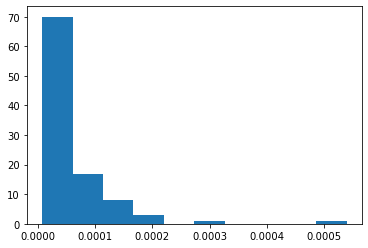

In [67]:
import matplotlib.pyplot as plt

plt.hist(freqs_pos);

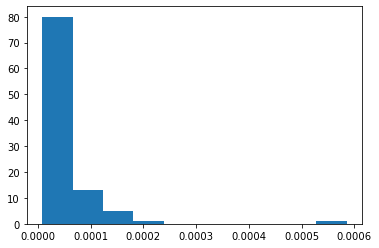

In [68]:
plt.hist(freqs_neg);

In [75]:
POS_pos = np.array([tup[1] for tup in sorted_by_freq[:200]])
POS_neg = np.array([tup[1] for tup in sorted_by_freq_neg[:200]])

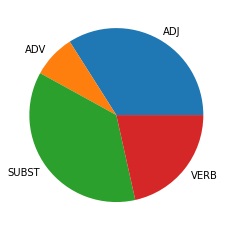

In [76]:
labels, counts = np.unique(POS_pos, return_counts = True)
plt.pie(counts, labels = labels);

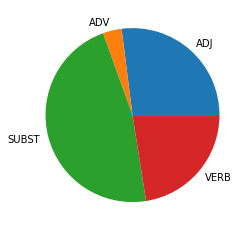

In [77]:
labels, counts = np.unique(POS_neg, return_counts = True)
plt.pie(counts, labels = labels);